# 1 - Informações sobre o Módulo - OK

# 2 - Estatística Descritiva - OK

Dados Qualitativos e Quantitativos.

Dos **QUANTITATIVOS** podemos fazer algumas análises:

## Métricas de Posição:

* Média Aritmética
* Mediana
* Moda
* Quartis

## Métricas de Dispersão

* Amplitude
* Variância (quadrática)
* Desvio Padrão (variância ajustada)

## Associação entre Variáveis Quantitativas

* Covariância
* Correlação

**GRÁFICO BOXPLOT**

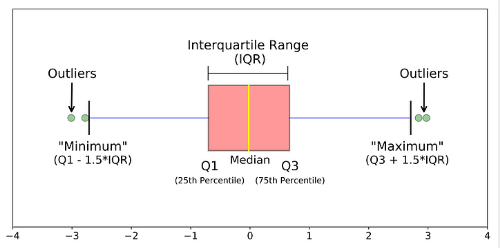

# 3 - Probabilidade - OK

## Métodos de Avaliação da Probabilidade

In [14]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
from math import factorial
from scipy.integrate import quad
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import expon

In [16]:
# Número de experimentos
N = 1000000

# Definindo os resultados de um dado a partir de números aleatórios entre 1 e 6
amostra = np.random.randint(low = 1, high = 7, size = N)

# Convertendo a amostra para uma Séries e calculando as frequências relativas
print(pd.Series(amostra).value_counts(normalize = True))

4    0.167067
2    0.166936
6    0.166695
3    0.166624
5    0.166506
1    0.166172
Name: proportion, dtype: float64


## Probabilidade da União de Eventos

Dados dois eventos aleatórios quaisquer A e B, o cálculo da probabilidade da união desses eventos.

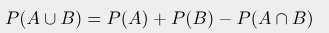

Exemplificando com uma aplicação, qual seria a probabilidade que em um lançamento de dado saia um **número par ou maior ou igual a 3**?

In [17]:
# Probabilidade de ser par [2,4,6]
p_a = 3/6

# Probabilidade de ser um número maior ou igual a 3 [3,4,5,6]
p_b = 4/6

# Interseção das probabilidades (ser par E maior ou igual a 3) [4,6]
p_i = 2/6

# Aplica-se a fórmula:
result = p_a + p_b - p_i
print(f'A probabilidade de sair um número par OU maior-igual a três é: {round(result*100, 2)}%')

A probabilidade de sair um número par OU maior-igual a três é: 83.33%


## Probabilidade Condicional

Sejam dois eventos aleatórios A e B. Define-se a probabilidade condicional entre esses eventos pela seguinte relação.

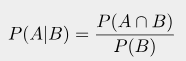

Por exemplo, qual a probabilidade de, ao lançar um dado, sair um número ímpar, dado que o número que saiu é maior do que 2?

In [18]:
# Probabilidade de ser um número maior do que dois [3,4,5,6]
p_b = 4/6

# Interseção das probabilidades (ser ímpar E maior do que dois) [3,5]
p_i = 2/6

# Aplica-se a fórmula:
result = p_i / p_b
print(f'A probabilidade de sair um número ímpar sabendo que o número que saiu é maior que dois: {round(result*100, 2)}%')

A probabilidade de sair um número ímpar sabendo que o número que saiu é maior que dois: 50.0%


## Teorema de Bayes

A ideia principal do Teorema de Bayes é inverter as probabilidades condicionais.

Por exemplo, queremos saber a probabilidade P(A|B) mas conhecemos apenas a probabilidade de P(B|A).

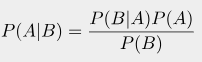

Um exemplo de aplicação deste teorema seria na avaliação de um determinado teste B em identificar uma doença A. Sabe-se que 1% das pessoas possui uma certa doença A, além disso o teste B não é totalmente confiável: ele acerta 90% dos casos positivos e 95% dos casos negativos. Qual a probabilidade de uma pessoa que fez o teste estar realmente doente, dado que o teste deu positivo?

In [19]:
# Probabilidade do teste A dar doente
p_a = 1/100

# Probabilidade da pessoa estar doente uma vez que o teste A deu doente
p_b_a = 90/100

# Probabilidade do teste B dar doente (considera as duas condições)
# Probabilidade do teste B dar doente e a pessoa estar doente
p_b_d = 90/100 * 1/100
# Probabilidade do teste B dar saudável e a pessoa estar doente
p_b_s = 5/100 * 99/100

p_b = p_b_d + p_b_s

# Aplicando o teorema:

result = (p_b_a * p_a) / p_b
print(f'A probabilidade da pessoa que fez o teste e deu DOENTE estar de fato DOENTE é: {round(result*100, 2)}%')

A probabilidade da pessoa que fez o teste e deu DOENTE estar de fato DOENTE é: 15.38%


# 4 - Distribuições de Probabilidade - EM ANDAMENTO

* Função de Probabilidade (caso discreto)

1.png

* Função de Densidade de Probabilidade (caso contínuo)

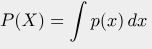

* Valor Esperado (Esperança) [Equivalente a MÉDIA]:

O valor esperado seria o produto da variável aleatória x e sua respectiva probabilidade, funcionando como se fosse uma **média ponderada para as probabilidades**.

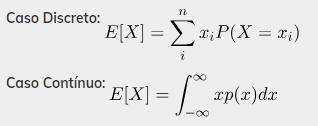

* Variância [Equivalente a DESVIO PADRÃO]:

A variância é o valor que mede a variabilidade, ou seja o quão dispersão estão as probabilidades em relação ao valor esperado.

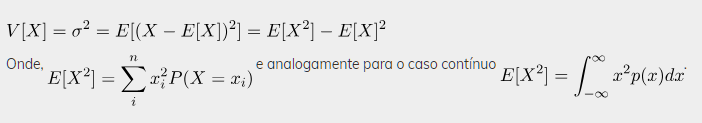

In [20]:
# EXEMPLO: Caso Discreto

# Vetor de eventos
X = [1, 2, 3, 4]

# Vetor de probabilidades
P = [0.3, 0.4, 0.2, 0.1]

# Cálculo do Valor esperado
esp = np.dot(X, P)
print("Valor Esperado: ", np.round(esp, 2))

# Cálculo da variância
var = np.round(np.dot(np.power(X, 2), P) - np.power(esp, 2), 2)
print("Variância: ", var)

Valor Esperado:  2.1
Variância:  0.89


In [21]:
# EXEMPLO: Caso Contínuo

# Função para a equação do valor esperado
def funcao_vlr_esperado(x):
    return x*(x*x)/3

# Cálculo da integral e o erro a partir da função anterior
esp, erro1 = quad(funcao_vlr_esperado, -1, 2)

# Print do valor esperado
print("Valor Esperado: ", esp)
print("Erro da Integral: ", erro1)

# Função para a equação do valor esperado x^2 a partir da função anterior
def funcao_variancia(x):
    return (x*x)*(x*x)/3

# Integral de x^2
esp_x2, erro2 = quad(funcao_variancia, -1, 2)

# Cálculo da variância
var = esp_x2 - esp*esp

# Print da variância
print("Variância:      ", round(var, 2))
print("Erro da Integral: ", erro2)

Valor Esperado:  1.25
Erro da Integral:  1.5728145305099745e-14
Variância:       0.64
Erro da Integral:  2.4424906541753447e-14


## Distribuição de Bernoulli

A distribuição de Bernoulli, trata-se apenas para um evento isolado, como por exemplo o lançamento de uma moeda. Quando o problema envolve eventos com repetições, utiliza-se o caso geral da distribuição de Bernoulli que seria uma Distribuição Binomial.

## Distribuição Binomial

Exemplo: Em uma caixa há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição. Calcule a probabilidade de:

In [27]:
# SAIAM 2 BOLAS BRANCAS

# Número de retiradas
n = 5
# Número de brancas
k = 2
# Probabilidade de uma bola branca
p = 8/12

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((binom.pmf(k, n, p) * 100), 2)} %")

A probabilidade para este evento será: 16.46 %


In [28]:
# SAIAM PELO MENOS 3 PRETAS

# Número de retiradas
n = 5
# Probabilidade de uma bola preta
p = 4/12
# Limite das retiradas
k = 2

# Calculando a probabilidade acumulada até 2 retiradas
prop = binom.cdf(k, n, p)

# Calcula a probabilidade complementar
prop_comp = 1 - prop

# Mostra o resultado da probabilidade complementar
print(f"A probabilidade para este evento será: {round((prop_comp * 100), 2)} %")

A probabilidade para este evento será: 20.99 %


## Distribuição Poisson

Exemplo: Em uma central telefônica chegam 300 ligações por hora. Sabendo que segue uma distribuição de Poisson, qual é a probabilidade de:

In [29]:
# EM 1 MINUTO NÃO OCORRA LIGAÇÕES?

# Definindo a taxa de ocorrência
mu = 5 # 300 chamadas / 60 minutos = 5 chamadas por minuto

# Frequência procurada
k = 0   # Não ocorrer ligações

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((poisson.pmf(k, mu) * 100), 2)} %")

A probabilidade para este evento será: 0.67 %


In [30]:
# EM 1 MINUTO OCORRA PELO MENOS 4 LIGAÇÕES?

# Definindo a taxa de ocorrência
mu = 5 # 300 chamadas / 60 minutos = 5 chamadas por minuto

# Frequência procurada
k = 2  # Até 2 ligações para usar a probabilidade complementar

# Cálculo da probabilidade acumulada até 2 ligações
prop = poisson.cdf(k, mu)

# Cálculo da probabilidade complementar
prop_comp = 1 - prop

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((prop_comp * 100), 2)} %")

A probabilidade para este evento será: 87.53 %


## Distribuição Exponencial

Exemplo: O intervalo de tempo, em minutos, entre emissões consecutivas de uma fonte radioativa é uma variável aleatória contínua que segue uma distribuição exponencial com parâmetro alpha = 0.2. Qual a probabilidade de que ocorra uma emissão em um intervalo inferior a 2 minutos?

In [31]:
# Define o parâmetro alpha
alpha = 0.2

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((expon.cdf(x = 2, scale = 1/alpha) * 100), 2)} %")

A probabilidade para este evento será: 32.97 %


## Distribuição Uniforme

A distribuição uniforme é uma distribuição bem simples e não possui parâmetros, a única diferença é que só vai haver probabilidade para um determinado evento.

## EXERCÍCIOS

GitHub: https://github.com/remarchese/DS_Braskem_1015